# Chapter 1: Data Generation

In this chapter, we are going to go through simple data generation examples,  
which includes the following features:  
A. General Data Generation:  
* A-1: Standard Normal  
* A-2: Multivariate Normal
* A-3: Gaussian Copula w/ Normal, Gamma, Exponential distributions  
* A-4: Lorenz Attractor
* A-5: Rössler Attractor
* A-6: Custom Equation [x*sin(x)]  
* A-7: Custom Attractor [Lorenz, Rössler]

B. Data Generation to Desired Location
* B-1: Generation to Different Sensors
* B-2. Generation within The Same Sensor

## A. General Data Generation

### Declaration

In [1]:
from data_generator import SensorDataGenerator as sdg

### A-1. 1-Sensor 1,000-sample Standard Normal distribution based generation [mean=0, stdev=1]

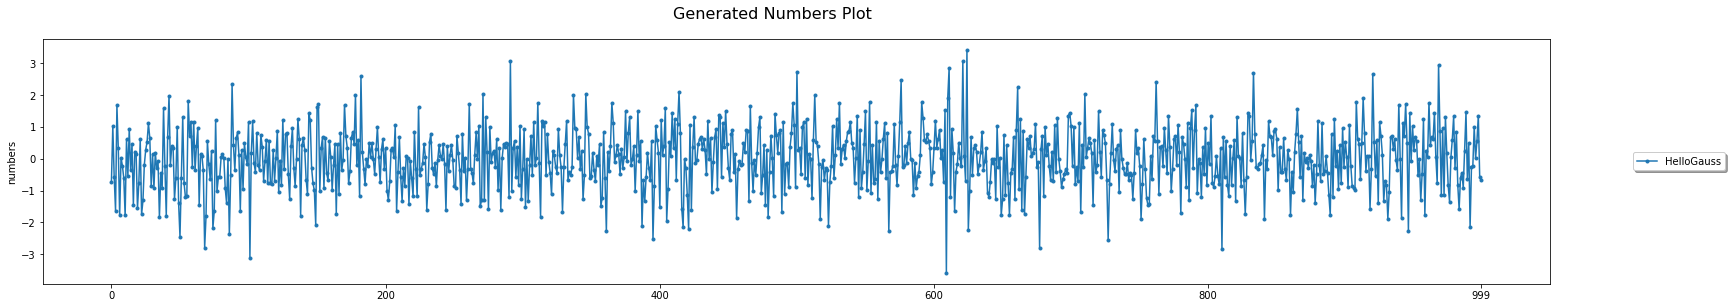

In [2]:
from data_generator import SensorDataGenerator as sdg

dg = sdg()
dg.generation_input.add_option(sensor_names="HelloGauss",
                               distribution="normal", 
                               mu=0, 
                               sigma=1)
dg.generate(sample_size=1000)
dg.plot_data()

### A-2. 2-Sensor 1,000-sample Multivariate-Normal distribution based generation  
#### [mean=[1,3], cov=[[1,0.7],[0.7,1]]
mu: mean value of each sensor data.  
cov: positive-semidefinite n x n matrix, where n=the number of sensors to create  
note that the number of sensor names are equal to the number of "mu"s and cov.shape[0]  

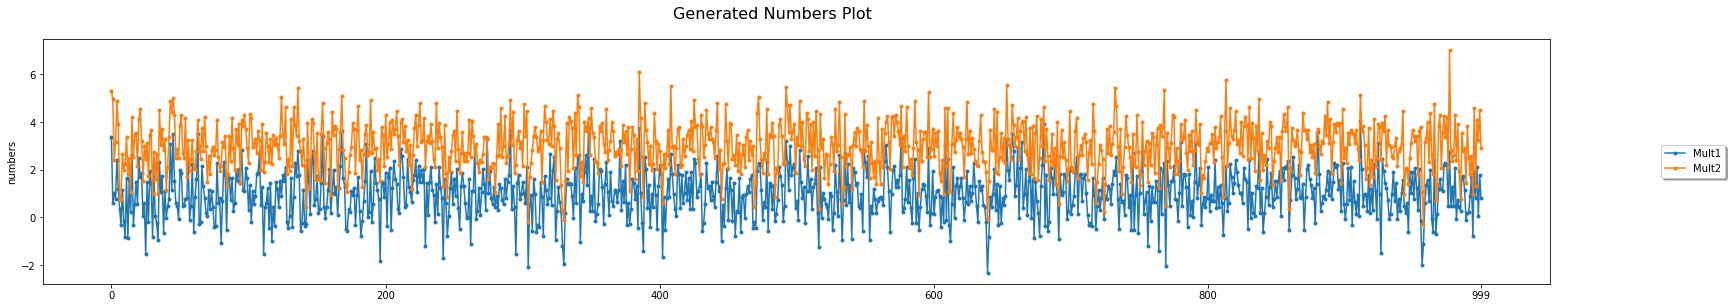

In [3]:
import numpy as np
from data_generator import SensorDataGenerator as sdg

dg = sdg()

# generating identity 2 x 2 identity matrix
covmat = np.eye(2)
covmat[0,1] = covmat[1,0] = 0.7

# generation input
dg.generation_input.add_option(sensor_names="Mult1 Mult2",
                               distribution="multivariatenormal",
                               mu = [1, 3], 
                               cov=covmat)

# generate samples
dg.generate(sample_size=1000)
dg.plot_data()

### A-3. 3-Sensor 1,000-sample Gaussian Copula w/ Normal, Gamma, Exponential distributions

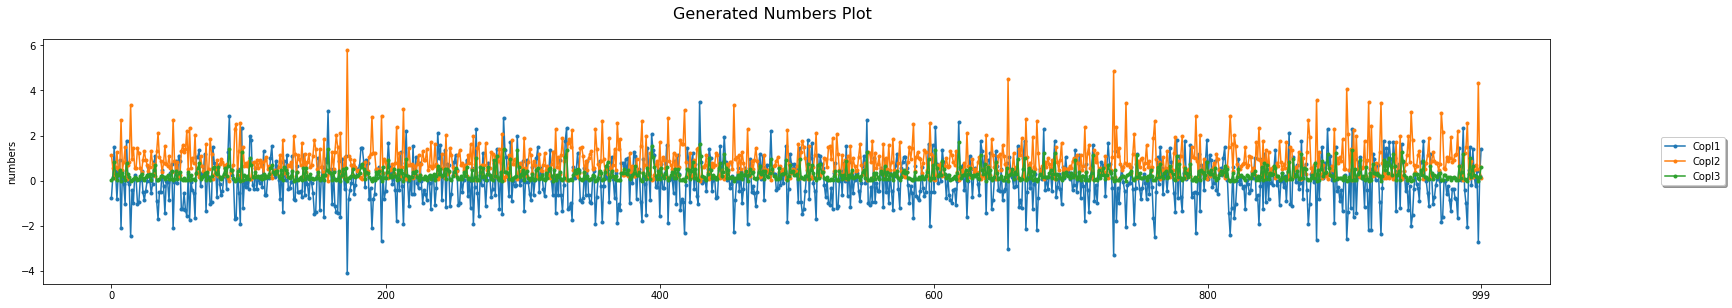

In [4]:
import numpy as np

from scipy.stats import random_correlation
from data_generator import SensorDataGenerator as sdg

dg = sdg()

# generating positive-semidefinite 3 x 3 covariance matrix
stdev = np.full(3, 1.0)
corrmat = random_correlation.rvs([2.9, 0.08, 0.02])
covmat = dg.generate_covmat(dim=3, sigmas=stdev, corrs=corrmat)
# is equivalent to "dg.generate_covmat(dim=3, sigmas=stdev, eigs=[2.9, 0.08, 0.02])"

# generation input
dg.generation_input.add_option(sensor_names="Copl1", distribution="normal", mu=0, sigma=1)
dg.generation_input.add_option(sensor_names="Copl2", distribution="gamma", alpha=1.5, beta=1.8)
dg.generation_input.add_option(sensor_names="Copl3", distribution="exponential", lambd=3.5)
dg.generation_input.copula(sensor_names="Copl1 Copl2 Copl3",
                               copula_type="gaussian", 
                               cov=covmat)

# generate samples
dg.generate(sample_size=1000)
dg.plot_data()

### A-4. Lorenz Attractor based generation [rho=28.0, sigma=10.0, beta=8/3]

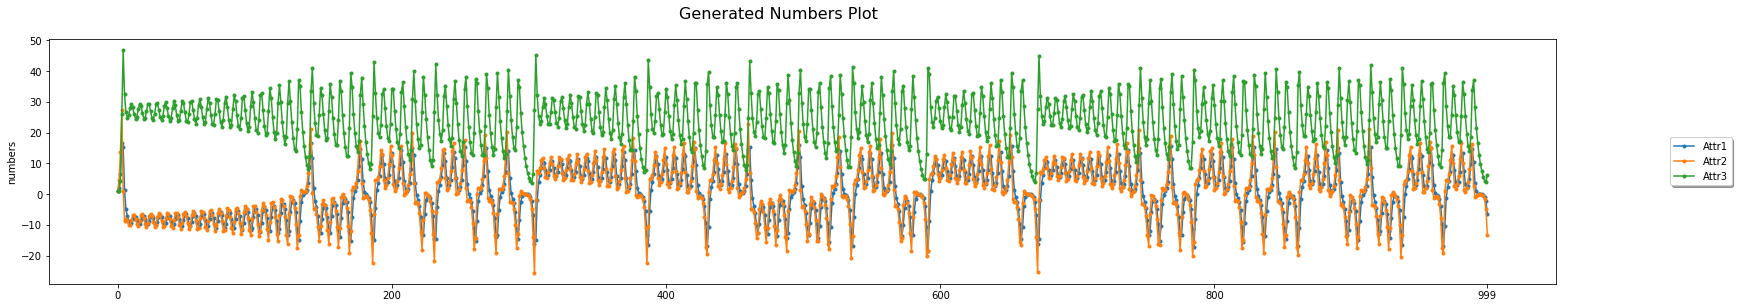

In [5]:
from data_generator import SensorDataGenerator as sdg

dg = sdg()
dg.generation_input.add_option(sensor_names="Attr1 Attr2 Attr3",
                               attractor="lorenz",
                               rho=28.0,
                               sigma=10.0,
                               beta=2.6667,
                               start_t=0.0,
                               initial_state=[1.0,1.0,1.0],
                               anomaly=0.0,
                               time_interval=0.1,
                               features=3)
dg.generate(sample_size=1000)
dg.plot_data()

### A-5. Rössler Attractor based generation [a=0.2, b=0.2, c=5.7]

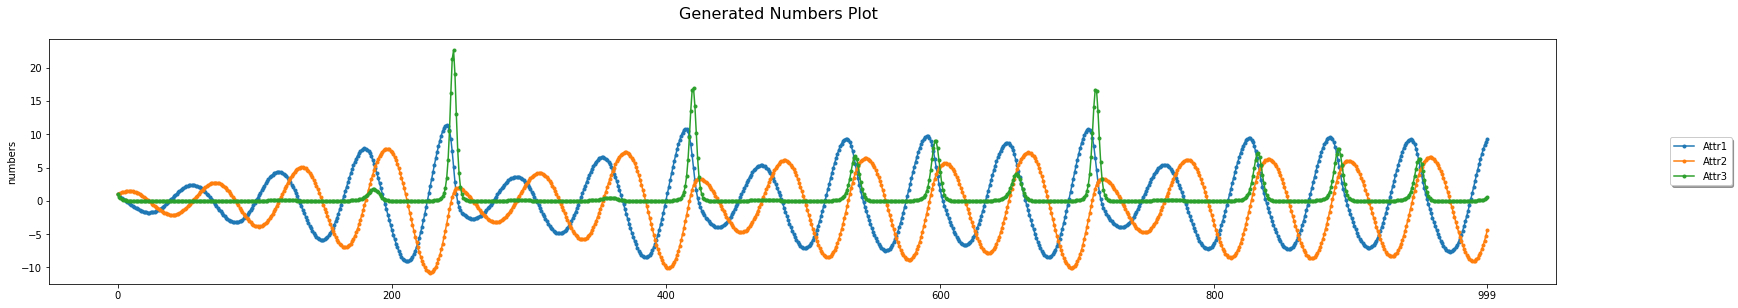

In [6]:
from data_generator import SensorDataGenerator as sdg

dg = sdg()
dg.generation_input.add_option(sensor_names="Attr1 Attr2 Attr3",
                               attractor="rossler",
                               a=0.2,
                               b=0.2,
                               c=5.7,
                               start_t=0.0,
                               initial_state=[1.0,1.0,1.0],
                               time_interval=0.1,
                               features=3)
dg.generate(sample_size=1000)
dg.plot_data()

### A-6. Custom Equation: f(x) = x*sin(x), initial x=0, step=0.01

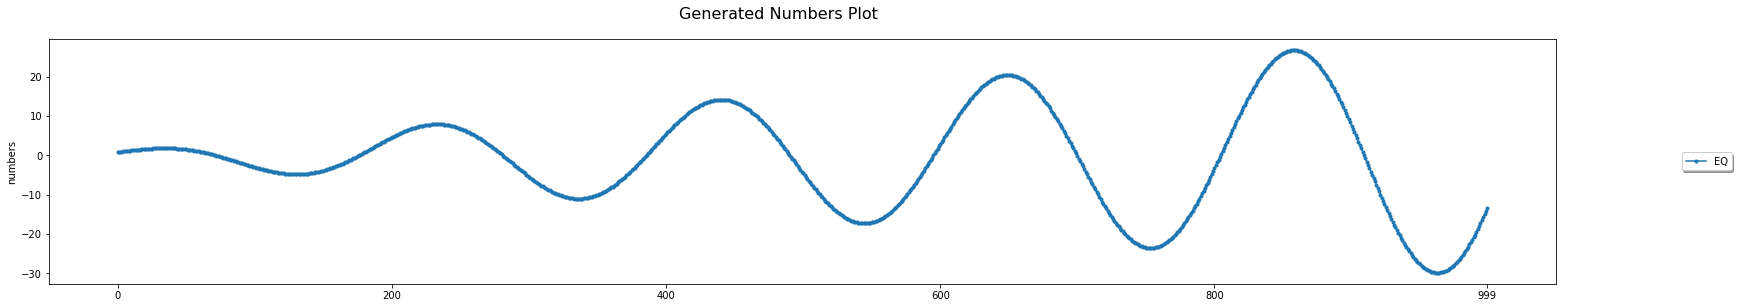

In [7]:
from data_generator import SensorDataGenerator as sdg

dg = sdg()
dg.generation_input.add_option(sensor_names="EQ", eq="x*sin(x)", intial={"x":0}, step={"x":0.03})
dg.generate(sample_size=1000)
dg.plot_data()

### A-7. Custom Attractor: Lorenz Attractor and Rössler Attractor Example

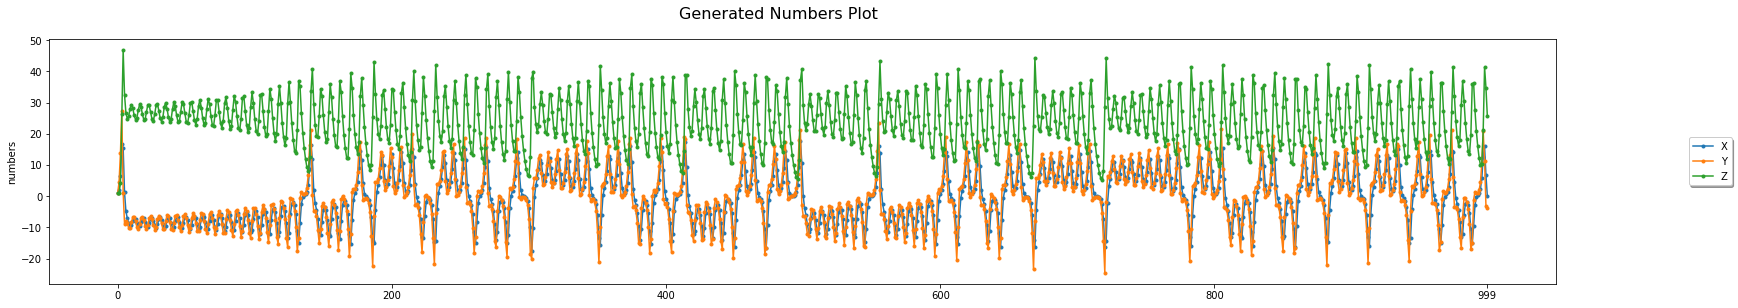

In [8]:
# Lorenz Attractor Example
#   https://en.wikipedia.org/wiki/Lorenz_system
#   The result might be slightly different from Attractor class' generation
#   due to different precision of SymPy

from data_generator import SensorDataGenerator as sdg

dg = sdg()
dg.generation_input.add_option(sensor_names="X Y Z",
                               at_eq="10.0*(y-x) x*(28.0-z)-y x*y-2.6667*z",
                               derivative_order="x y z",
                               initial={"x":1.0, "y":1.0, "z":1.0},
                               start_t=0.0,
                               time_interval=0.1)
dg.generate(sample_size=1000)
dg.plot_data()

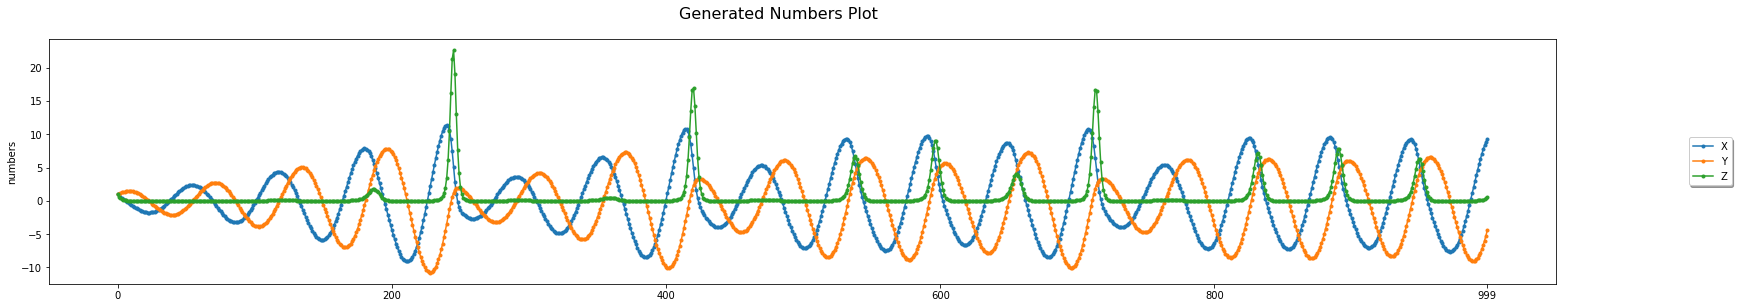

In [9]:
# Rössler Attractor Example
#   https://en.wikipedia.org/wiki/R%C3%B6ssler_attractor

from data_generator import SensorDataGenerator as sdg

dg = sdg()
sample_size = 1000
seed = 20171221
dg.generation_input.add_option(sensor_names="X Y Z",
                               custom_attractor="yes",
                               at_eq="-y-z x+0.2*y 0.2+z*(x-5.7)",
                               derivative_order="x y z",
                               initial={"x":1.0, "y":1.0, "z":1.0},
                               start_t=0.0,
                               time_interval=0.1)
dg.generate(sample_size, seed=seed)
dg.plot_data()

### A-all-together: Making A-1 to A-7 at the same time

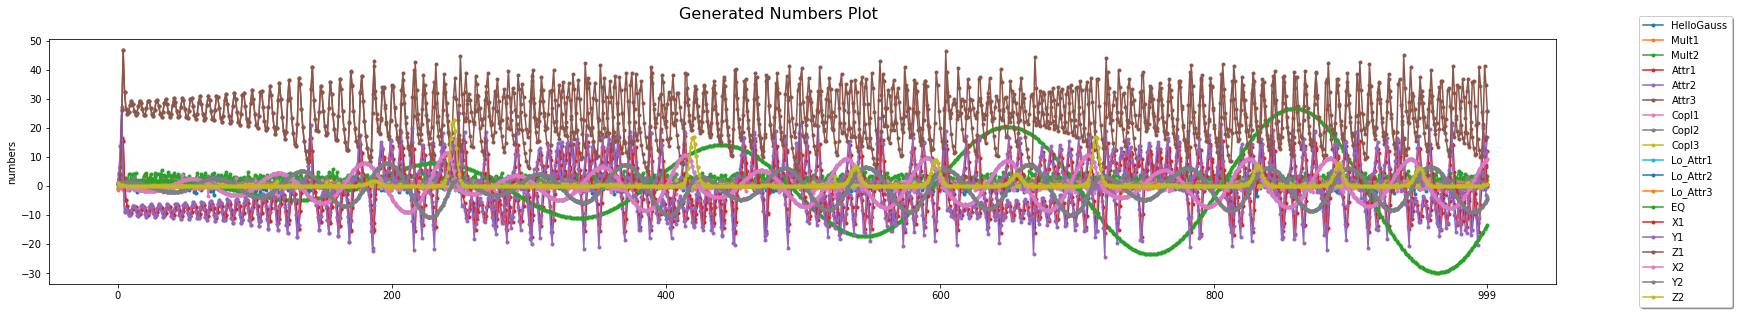

In [10]:
import numpy as np

from scipy.stats import random_correlation
from data_generator import SensorDataGenerator as sdg


dg = sdg()

# generating covariance matrix of 2-sensor multivariate normal w/ both sigma=1, corr(sensor1, sensor2)=0.7
covmat_multn = np.eye(2)
covmat_multn[0,1] = covmat_multn[1,0] = 0.7

# generating positive-semidefinite 3 x 3 covariance matrix
stdev = np.full(3, 1.0)
corrmat = random_correlation.rvs([2.9, 0.08, 0.02])
covmat_copl = dg.generate_covmat(dim=3, sigmas=stdev, corrs=corrmat)

# generation input
dg.generation_input.add_option(sensor_names="HelloGauss",
                               distribution="normal", 
                               mu=0, 
                               sigma=1)
dg.generation_input.add_option(sensor_names="Mult1 Mult2",
                               distribution="multivariatenormal",
                               mu = [1, 3], 
                               cov=covmat_multn)
dg.generation_input.add_option(sensor_names="Attr1 Attr2 Attr3",
                               attractor="lorenz",
                               rho=28.0,
                               sigma=10.0,
                               beta=8.0/3.0,
                               initial_state=[1,1,1],
                               anomaly=0.0,
                               time_inteval=1,
                               features=3)
dg.generation_input.add_option(sensor_names="Copl1", distribution="normal", mu=0, sigma=1)
dg.generation_input.add_option(sensor_names="Copl2", distribution="gamma", alpha=1.5, beta=1.8)
dg.generation_input.add_option(sensor_names="Copl3", distribution="exponential", lambd=3.5)
dg.generation_input.copula(sensor_names="Copl1 Copl2 Copl3",
                               copula_type="gaussian", 
                               cov=covmat_copl)
dg.generation_input.add_option(sensor_names="Lo_Attr1 Lo_Attr2 Lo_Attr3",
                               attractor="rossler",
                               a=0.2,
                               b=0.2,
                               c=5.7,
                               start_t=0.0,
                               initial_state=[1.0,1.0,1.0],
                               time_interval=0.1,
                               features=3)
dg.generation_input.add_option(sensor_names="EQ", eq="x*sin(x)", intial={"x":0}, step={"x":0.03})
dg.generation_input.add_option(sensor_names="X1 Y1 Z1",
                               at_eq="10.0*(y-x) x*(28.0-z)-y x*y-2.6667*z",
                               derivative_order="x y z",
                               initial={"x":1.0, "y":1.0, "z":1.0},
                               start_t=0.0,
                               time_interval=0.1)
dg.generation_input.add_option(sensor_names="X2 Y2 Z2",
                               custom_attractor="yes",
                               at_eq="-y-z x+0.2*y 0.2+z*(x-5.7)",
                               derivative_order="x y z",
                               initial={"x":1.0, "y":1.0, "z":1.0},
                               start_t=0.0,
                               time_interval=0.1)
dg.generate(sample_size=1000)
dg.plot_data()

## B. Data Generation to Desired Location

### B-1.  Generation to Different Sensors

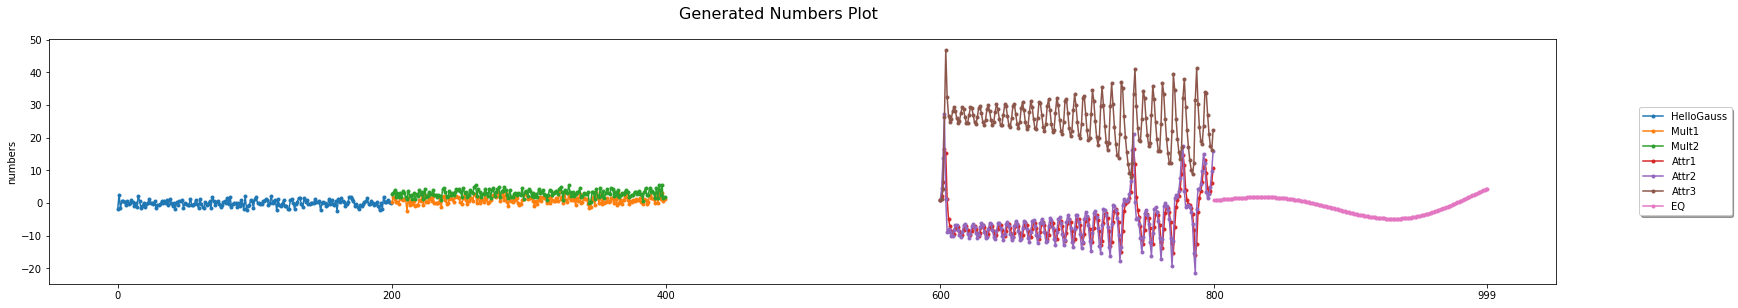

In [11]:
dg = sdg()

# generating covariance matrix of 2-sensor multivariate normal w/ both sigma=1, corr(sensor1, sensor2)=0.7
covmat = np.eye(2)
covmat[0,1] = covmat[1,0] = 0.7

dg.generation_input.add_option(sensor_names="HelloGauss",
                               distribution="normal", 
                               mu=0, 
                               sigma=1,
                               frm=0, to=200)
dg.generation_input.add_option(sensor_names="Mult1 Mult2",
                               distribution="multivariatenormal",
                               mu = [1, 3], 
                               cov=covmat,
                               frm=200, to=400)
dg.generation_input.add_option(sensor_names="Attr1 Attr2 Attr3",
                               attractor="lorenz",
                               rho=28.0,
                               sigma=10.0,
                               beta=8.0/3.0,
                               initial_state=[1,1,1],
                               anomaly=0.0,
                               time_inteval=1,
                               features=3,
                               frm=600, to=800)
dg.generation_input.add_option(sensor_names="EQ", eq="x*sin(x)",
                               intial={"x":0}, step={"x":0.03},
                               frm=800)
dg.generate(sample_size=1000)
dg.plot_data()

*note that [400, 600] is empty since generation option for [400, 600] is not defined

### B-2. Generation within The Same Sensor

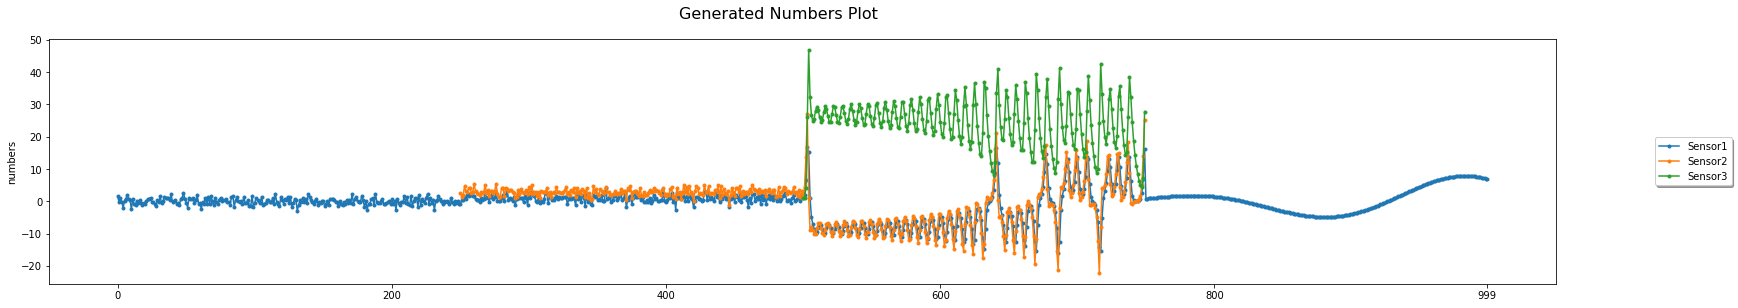

In [12]:
dg = sdg()

# generating covariance matrix of 2-sensor multivariate normal w/ both sigma=1, corr(sensor1, sensor2)=0.7
covmat = np.eye(2)
covmat[0,1] = covmat[1,0] = 0.7

dg.generation_input.add_option(sensor_names="Sensor1",
                               distribution="normal", 
                               mu=0, 
                               sigma=1)
dg.generation_input.add_option(sensor_names="Sensor1 Sensor2",
                               distribution="multivariatenormal",
                               mu = [1, 3], 
                               cov=covmat,
                               frm=250, to=500)
dg.generation_input.add_option(sensor_names="Sensor1 Sensor2 Sensor3",
                               attractor="lorenz",
                               rho=28.0,
                               sigma=10.0,
                               beta=8.0/3.0,
                               initial_state=[1,1,1],
                               anomaly=0.0,
                               time_inteval=1,
                               features=3,
                               frm=500, to=750)
dg.generation_input.add_option(sensor_names="Sensor1", eq="x*sin(x)",
                               intial={"x":0}, step={"x":0.03},
                               frm=750)
dg.generate(sample_size=1000)
dg.plot_data()

#### let's see how Sensor1 was generated:

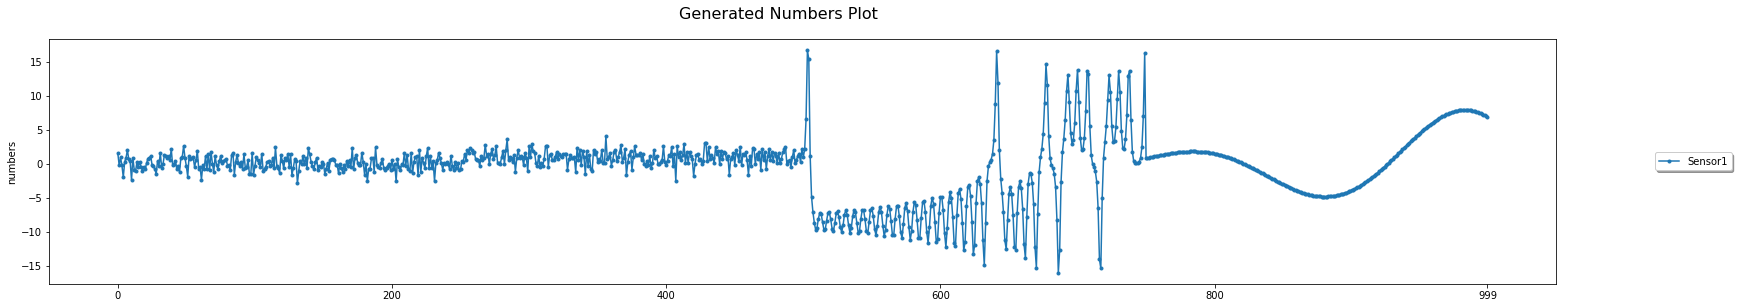

In [13]:
dg.plot_data(sensors=["Sensor1"])

*note that "Sensor1" was replaced with three different generations at [250,1000]:  
[250,500)  ~ multivariate-normal Sensor1  
[500,750)  ~ lorenz Sensor1  
[750,1000) ~ xsin(x)

So far, we've learned very basic data generation scheme from the examples above.  
Now, let's move onto the next tutorial: "Chapter2: Data Modification"  
so that we can learn simple data modification w/ Data Generator.  